# Visualizing Earnings Based On College Majors

In this project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- **Rank** - Rank by median earnings (the dataset is ordered by this column).
- **Major_code** - Major code.
- **Major** - Major description.
- **Major_category** - Category of major.
- **Total** - Total number of people with major.
- **Sample_size** - Sample size (unweighted) of full-time.
- **Men** - Male graduates.
- **Women** - Female graduates.
- **ShareWomen** - Women as share of total.
- **Employed** - Number employed.
- **Median** - Median salary of full-time, year-round workers.
- **Low_wage_jobs** - Number in low-wage service jobs.
- **Full_time** - Number employed 35 hours or more.
- **Part_time** - Number employed less than 36 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
  - Using scatter plots
- How many majors are predominantly male? Predominantly female?
  - Using histograms
- Which category of majors have the most students?
  - Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [28]:
# setup the enironment
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[:0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

Empty DataFrame
Columns: [Rank, Major_code, Major, Total, Men, Women, Major_category, ShareWomen, Sample_size, Employed, Full_time, Part_time, Full_time_year_round, Unemployed, Unemployment_rate, Median, P25th, P75th, College_jobs, Non_college_jobs, Low_wage_jobs]
Index: []

[0 rows x 21 columns]
   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineeri

In [29]:
raw_data_count = len(recent_grads.index)
raw_data_count

173

In [30]:
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.index)
cleaned_data_count

172

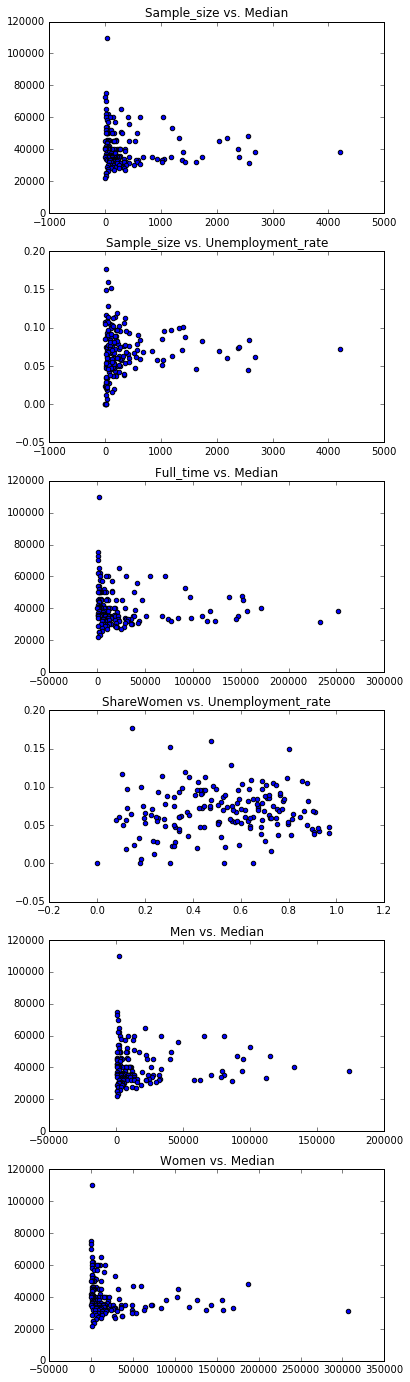

In [33]:
fig = plt.figure(figsize=(6, 24))
ax1 = fig.add_subplot(6, 1, 1)
ax2 = fig.add_subplot(6, 1, 2)
ax3 = fig.add_subplot(6, 1, 3)
ax4 = fig.add_subplot(6, 1, 4)
ax5 = fig.add_subplot(6, 1, 5)
ax6 = fig.add_subplot(6, 1, 6)

ax1.scatter(recent_grads['Sample_size'], recent_grads['Median'])
ax1.set_title('Sample_size vs. Median')

ax2.scatter(recent_grads['Sample_size'], recent_grads['Unemployment_rate'])
ax2.set_title('Sample_size vs. Unemployment_rate')

ax3.scatter(recent_grads['Full_time'], recent_grads['Median'])
ax3.set_title('Full_time vs. Median')

ax4.scatter(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'])
ax4.set_title('ShareWomen vs. Unemployment_rate')

ax5.scatter(recent_grads['Men'], recent_grads['Median'])
ax5.set_title('Men vs. Median')

ax6.scatter(recent_grads['Women'], recent_grads['Median'])
ax6.set_title('Women vs. Median')

plt.show()

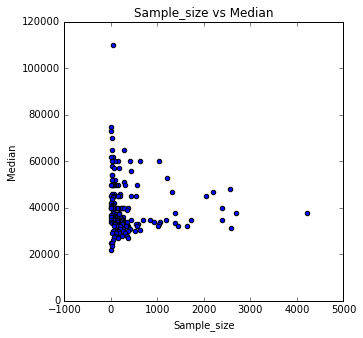

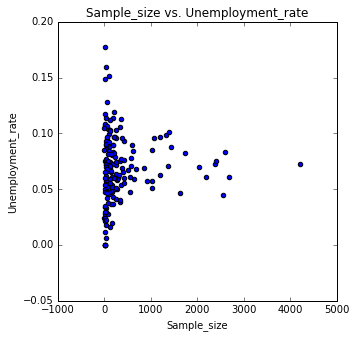

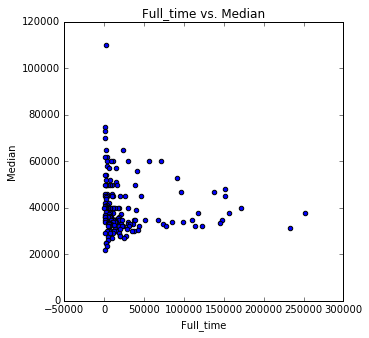

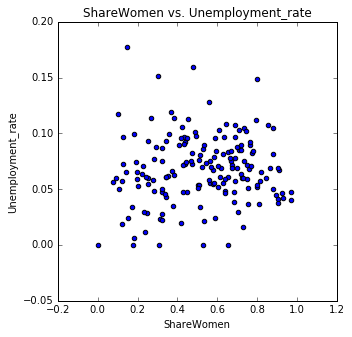

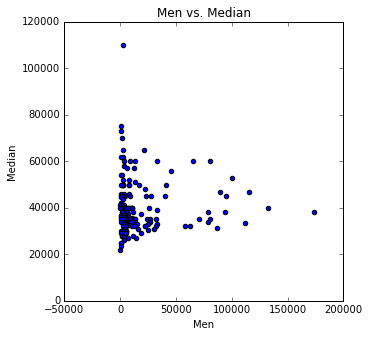

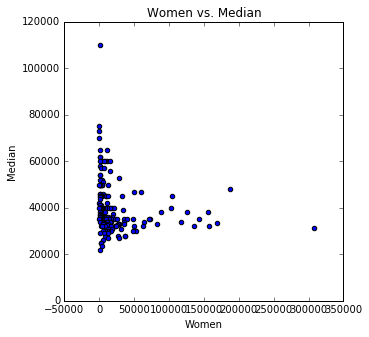

In [37]:
# another way to build the same scatter plots
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample_size vs Median', figsize=(5,5))
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample_size vs. Unemployment_rate', figsize=(5,5))
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time vs. Median', figsize=(5,5))
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs. Unemployment_rate', figsize=(5,5))
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median', figsize=(5,5))
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median', figsize=(5,5))

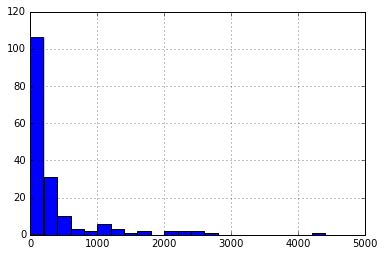

In [39]:
# building histograms
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

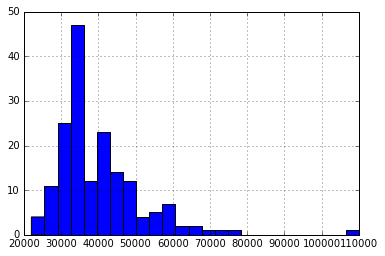

In [41]:
recent_grads['Median'].hist(bins=25)

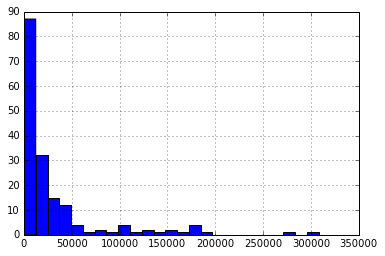

In [42]:
recent_grads['Employed'].hist(bins=25)

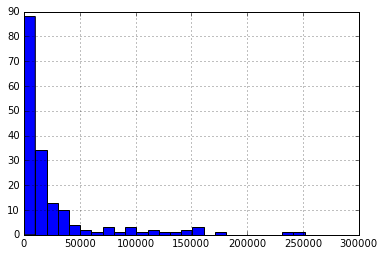

In [43]:
recent_grads['Full_time'].hist(bins=25)

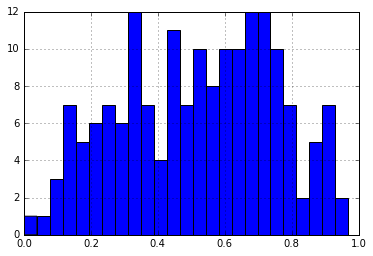

In [44]:
recent_grads['ShareWomen'].hist(bins=25)

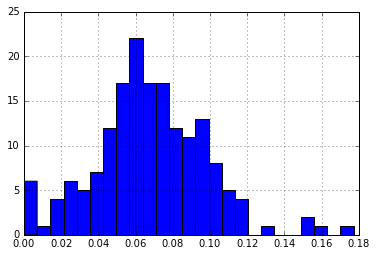

In [45]:
recent_grads['Unemployment_rate'].hist(bins=25)

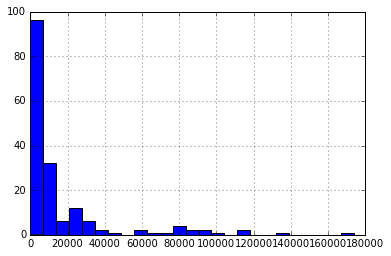

In [46]:
recent_grads['Men'].hist(bins=25)

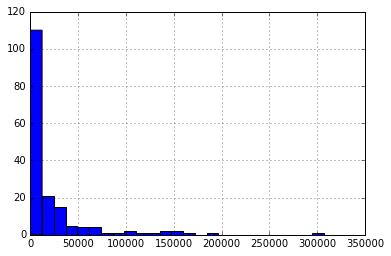

In [48]:
recent_grads['Women'].hist(bins=25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe83d0f7f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe83d053390>]], dtype=object)

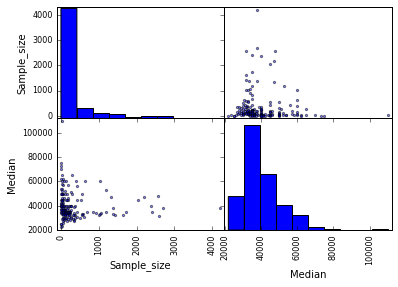

In [49]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[["Sample_size", "Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe83d0a8a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe83cd309b0>]], dtype=object)

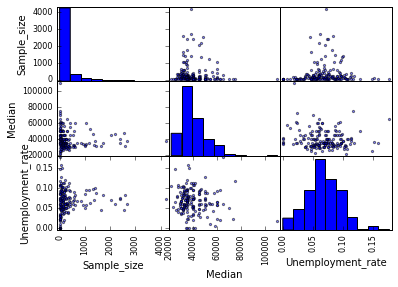

In [50]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]])

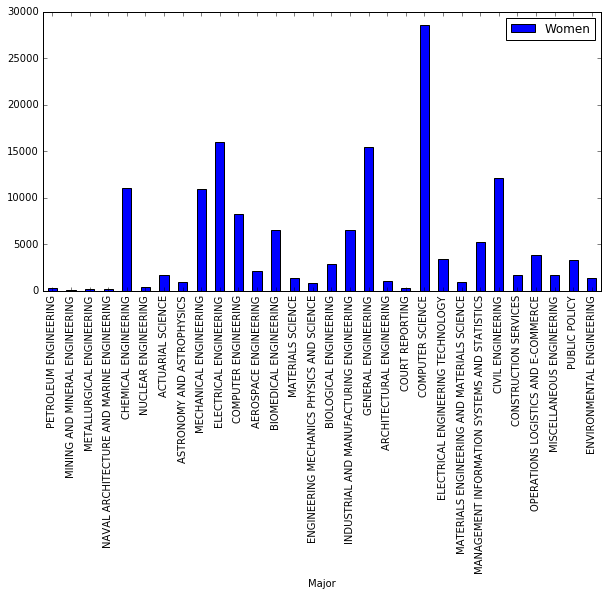

In [57]:
recent_grads[:30].plot.bar(x='Major', y='Women', figsize=(10,5))

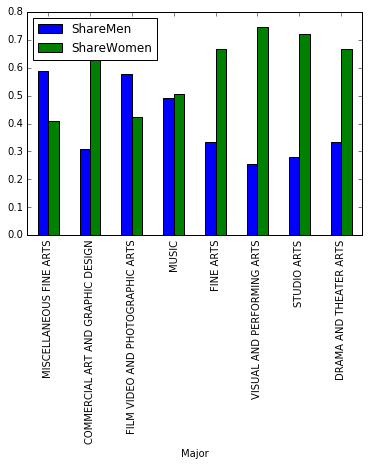

In [51]:
recent_grads['ShareMen'] = recent_grads['Men'] / recent_grads['Total']
arts = recent_grads[recent_grads["Major_category"] == "Arts"]
arts.set_index("Major", inplace=True)
arts[["ShareMen", "ShareWomen"]].plot(kind="bar")
plt.show()

Some further ideas to keep exploring these other visualizations:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.